In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

plt.style.use('default')
sns.set(style='darkgrid')

pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv('./data/data_cleaned.csv')

In [3]:
df.head()

,tPos_+ve_0.100000,tPos_+ve_0.200000,tPos_+ve_0.300000,tPos_+ve_0.400000,tPos_+ve_0.500000,tPos_+ve_0.600000,tPos_+ve_0.700000,tPos_+ve_0.800000,tPos_+ve_0.900000,tPos_+ve_0.910000,...,rpm_d1_+ve_0.920000,rpm_d1_+ve_0.930000,rpm_d1_+ve_0.940000,rpm_d1_+ve_0.950000,rpm_d1_+ve_0.960000,rpm_d1_+ve_0.970000,rpm_d1_+ve_0.980000,rpm_d1_+ve_0.990000,rpm_d1_-ve_std,rpm_d1_+ve_std
0,12.941176,14.117647,14.509804,15.686275,17.254902,20.000000,23.137255,40.784314,89.019608,89.019608,...,285.73,307.03,339.62,369.750,415.07,514.370,662.74,889.5000,324.795434,303.617734
1,14.509804,14.901961,15.294118,16.470588,18.039216,19.215686,20.392157,21.568627,24.313725,24.705882,...,269.18,300.88,346.90,441.275,600.42,741.900,902.23,1262.8275,532.314036,368.599367
2,12.549020,13.725490,13.725490,14.117647,14.901961,16.078431,18.039216,20.470588,25.098039,25.882353,...,1204.41,1330.70,1478.70,1615.900,1715.23,1831.570,1962.38,2122.7400,575.877429,603.754775
3,12.549020,13.725490,14.509804,14.509804,14.901961,15.294118,16.078431,17.254902,19.215686,19.607843,...,591.28,750.99,869.04,972.125,1104.77,1271.485,1400.33,1472.2850,343.656382,321.349360
4,13.725490,14.509804,15.686275,18.431373,22.352941,35.607843,88.627451,89.019608,89.019608,89.019608,...,276.00,294.99,319.76,351.025,397.14,474.855,667.84,900.7100,180.086193,160.670903


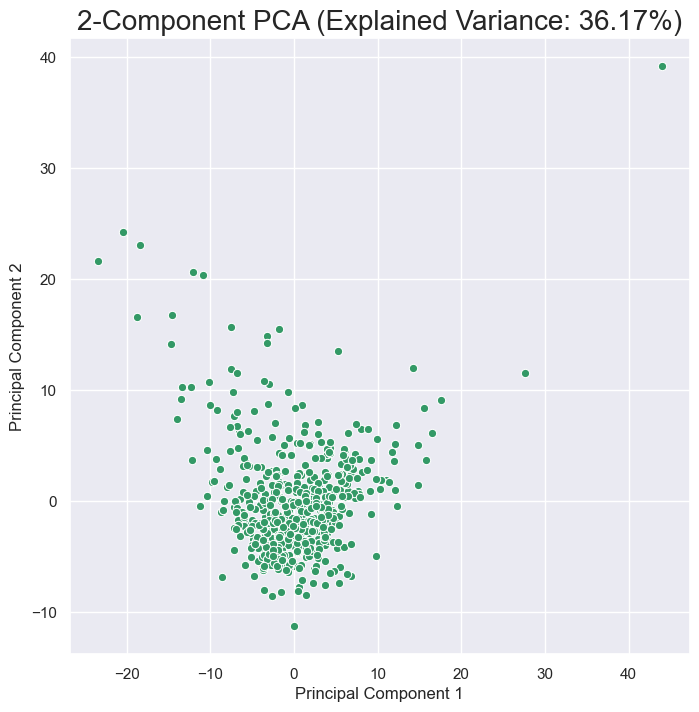

In [4]:
pca = PCA(n_components=2)
X_pca = df.values
X_pca = StandardScaler().fit_transform(X_pca)
components = pca.fit_transform(X_pca)
explained_variance = 100*sum(pca.explained_variance_ratio_)
df_pca = pd.DataFrame(data=components, columns=['Principal Component 1',
                                               'Principal Component 2'])


fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax, data=df_pca, x='Principal Component 1', y='Principal Component 2',
               color='#339966')
ax.set_title('2-Component PCA (Explained Variance: {:.2f}%)'.format(explained_variance), size=20)
plt.show()

In [5]:
pca_table = {
    'Num. Components' : [],
    'Explained Var.' : []
}

for k in range(1, 81):
    pca = PCA(n_components=k)
    X_pca = df.values
    X_pca = StandardScaler().fit_transform(X_pca)
    components = pca.fit_transform(X_pca)
    explained_variance = sum(pca.explained_variance_ratio_)
    pca_table['Num. Components'].append(k)
    pca_table['Explained Var.'].append(explained_variance)

df_pca_table = pd.DataFrame(pca_table)
df_pca_table

,Num. Components,Explained Var.
0,1,0.202072
1,2,0.361707
2,3,0.485690
3,4,0.583296
4,5,0.663204
5,6,0.716375
6,7,0.760433
7,8,0.790859
8,9,0.816895
9,10,0.835311


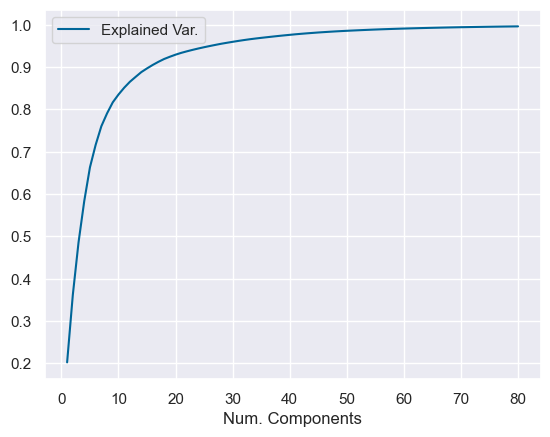

In [6]:
df_pca_table.plot(x='Num. Components', y='Explained Var.',
                 color='#006699')
plt.show()

In [7]:
pca = PCA(n_components=50)
X_pca = df.values
X_pca = StandardScaler().fit_transform(X_pca)
X = pca.fit_transform(X_pca)

In [8]:
wcss = []
silhouette_coefficients = []

min_cluster = 2
max_cluster = 30

for k in range(min_cluster, max_cluster+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(sil_score)
    
knee_loc = KneeLocator(range(min_cluster, max_cluster+1), wcss,
                      curve='convex', direction='decreasing')


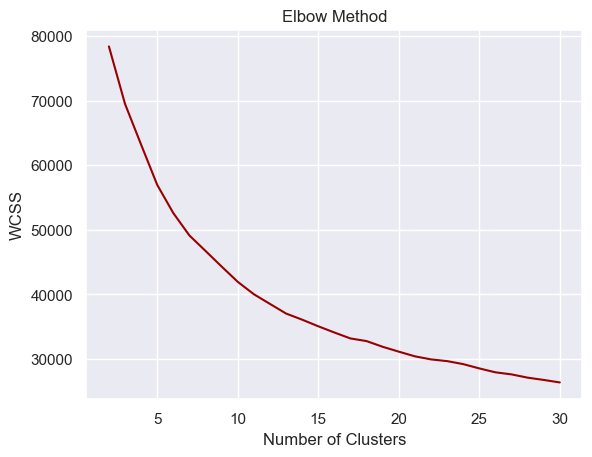

In [9]:
plt.plot(range(min_cluster, max_cluster+1), wcss,
        color='#990000')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
knee_loc.elbow

11

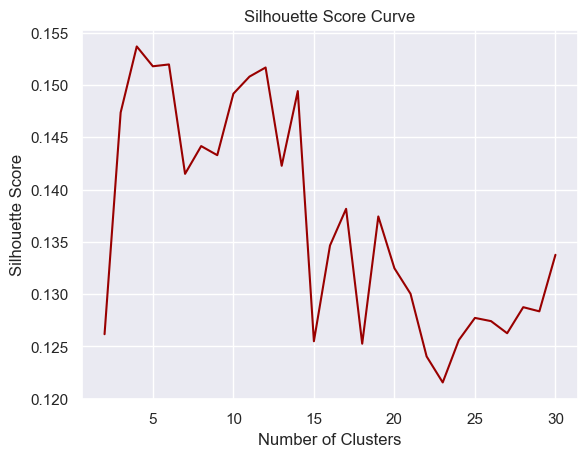

In [11]:
plt.plot(range(min_cluster, max_cluster+1), silhouette_coefficients,
        color='#990000')
plt.title('Silhouette Score Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()